In [1]:
class ADABOOST:
    def __init__(self, itr):
        self.itr = itr
    def fit(self, X, Y):
        # To initialize the initial weights of each datapoint
        N = len(X)
        w = np.full(N, 1/N)
         
        # To store each weak classifier and its corresponding weight
        self.Classifier = []
        self.Alpha = []
        
        for i in range(self.itr):
            # Fitting the weak classifier i.e., Decision stump
            c = DecisionTreeClassifier(max_depth=1)
            c.fit(X, Y, sample_weight=w)
            
            c_pred = c.predict(X)
            
            error = np.sum(w* (c_pred!= Y))
            
            alpha = 0.5* np.log((1-error)/ (error+1e-10))
            
            self.Classifier.append(c)
            self.Alpha.append(alpha)
            
            w = w* np.exp(-alpha*Y*c_pred)
            w = w/np.sum(w)
    def Predict(self, X):
        y_pred = np.zeros(len(X))
        
        for classifier, alpha in zip(self.Classifier, self.Alpha):
            y_pred = y_pred + alpha * classifier.predict(X)
        return np.sign(y_pred)

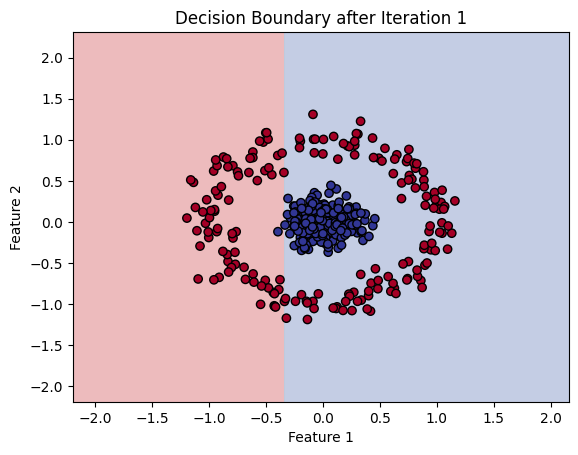

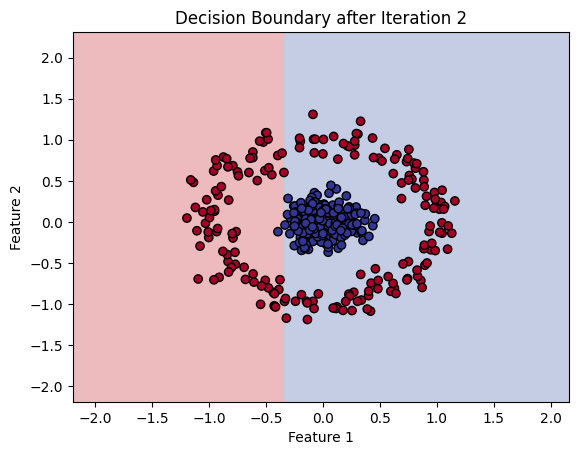

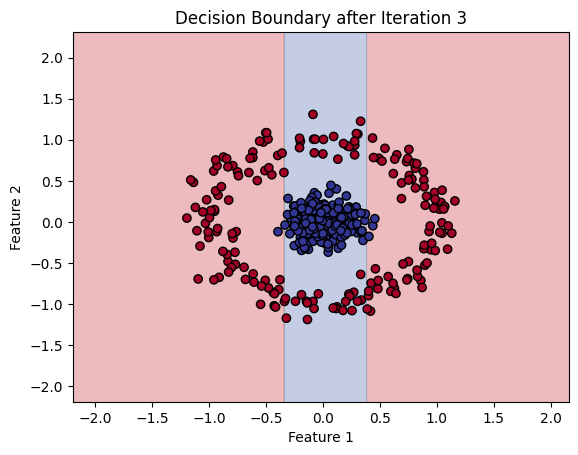

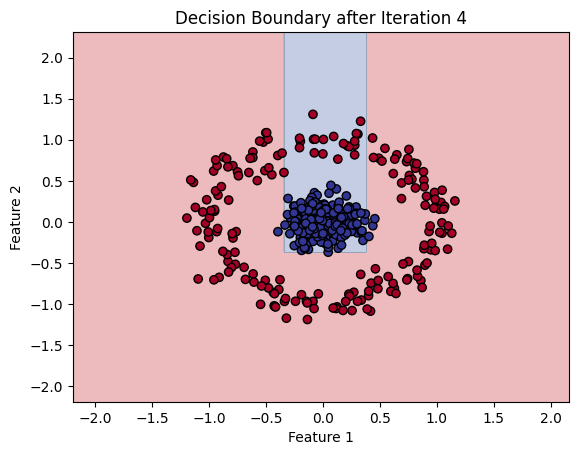

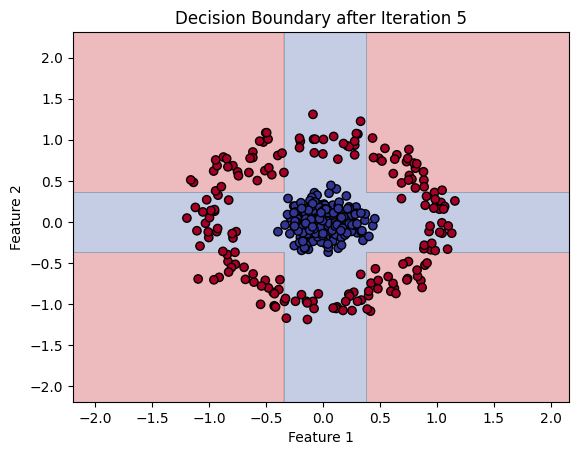

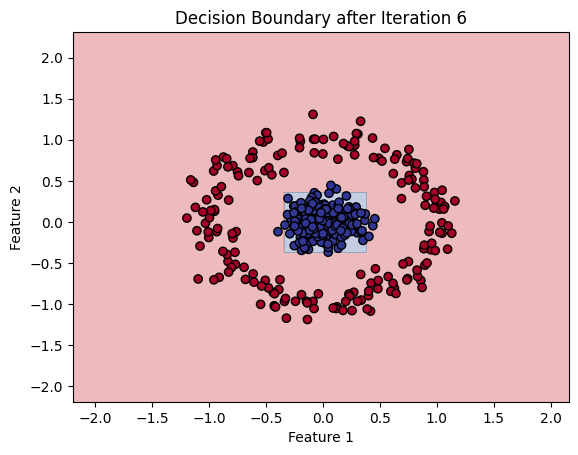

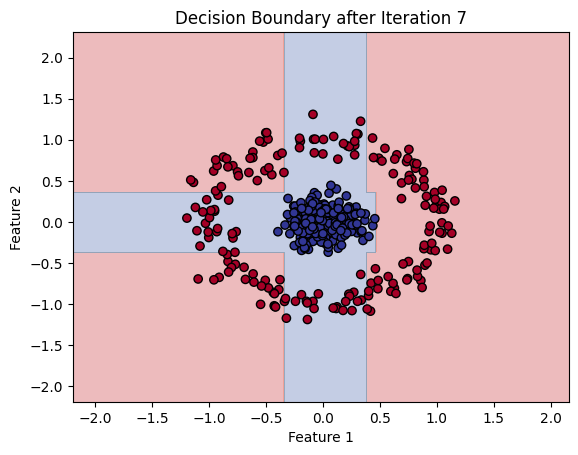

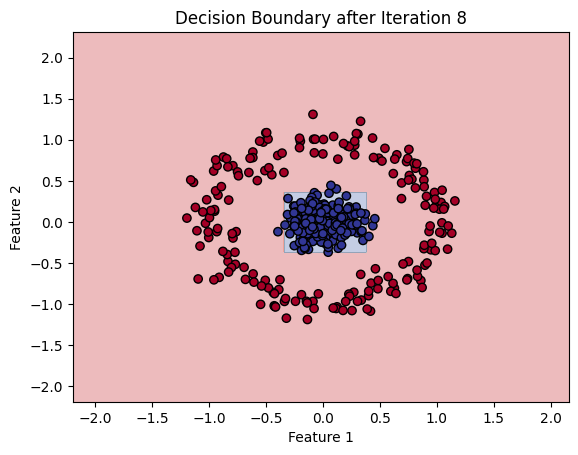

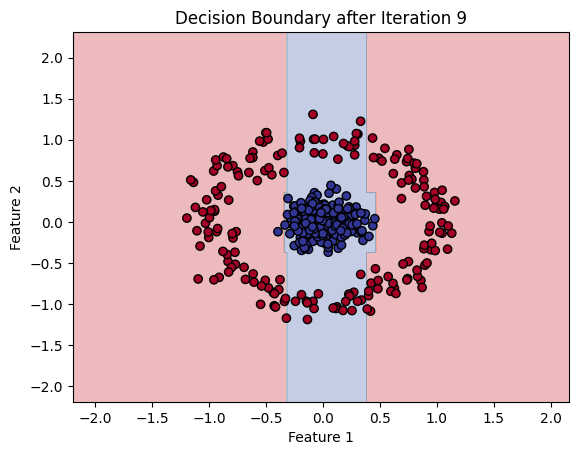

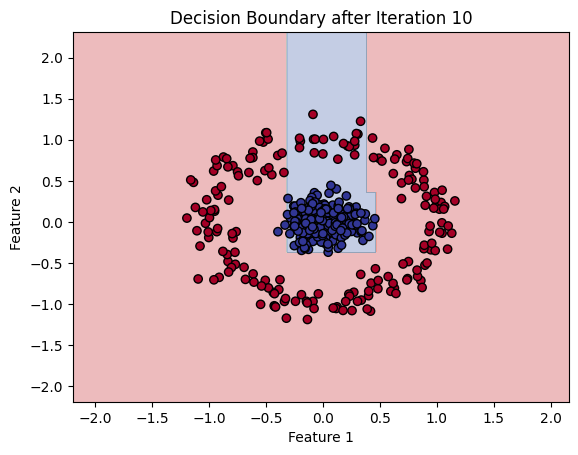

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

class AdaBoost:
    def __init__(self, itr=25, eta=0.5):
        self.itr = itr
        self.eta = eta

    def fit(self, X, Y):
        No_Samples = len(X)
        w = np.full(No_Samples, 1 / No_Samples)

        self.classifier = []
        self.alpha = []

        for i in range(self.itr):
            # Fitting the weak classifier (Decision stump)
            Classifier = DecisionTreeClassifier(max_depth=1)
            Classifier.fit(X, Y, sample_weight=w)

            Classifier_predict = Classifier.predict(X)

            # Compute error: Sum of weights of all the incorrectly classified points
            error = np.sum(w * (Classifier_predict != Y))

            # Alpha
            Alpha = 0.5 * np.log((1 - error) / (error + 1e-10))

            # Storing classifier and its weights (alpha)
            self.classifier.append(Classifier)
            self.alpha.append(Alpha)

            # Update weights
            w = w * np.exp(-Alpha * Y * Classifier_predict)
            w = w / np.sum(w)

            # Plotting decision boundary after each fit
            self.plot_decision_boundary(X, Y, i)

    def Predict(self, X):
        y_pred = np.zeros(X.shape[0])

        for classifier, alpha in zip(self.classifier, self.alpha):
            y_pred += self.eta * alpha * classifier.predict(X)
        return np.sign(y_pred)

    def plot_decision_boundary(self, X, Y, iteration):
        # Create a mesh grid
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict on the mesh grid using the current model
        Z = np.zeros(xx.ravel().shape)
        
        # Calculate predictions based on current weak learners
        for classifier, alpha in zip(self.classifier, self.alpha):
            Z += self.eta * alpha * classifier.predict(np.c_[xx.ravel(), yy.ravel()])

        Z = np.sign(Z).reshape(xx.shape)

        # Plotting decision boundary
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
        plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.RdYlBu)
        plt.title(f'Decision Boundary after Iteration {iteration + 1}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.show()

# Example usage
X, y = make_circles(n_samples=500, noise=0.1, random_state=42, factor=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Convert labels from 0 to -1
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

# Train AdaBoost
ada = AdaBoost(itr=10, eta=0.5)
ada.fit(X_train, y_train)


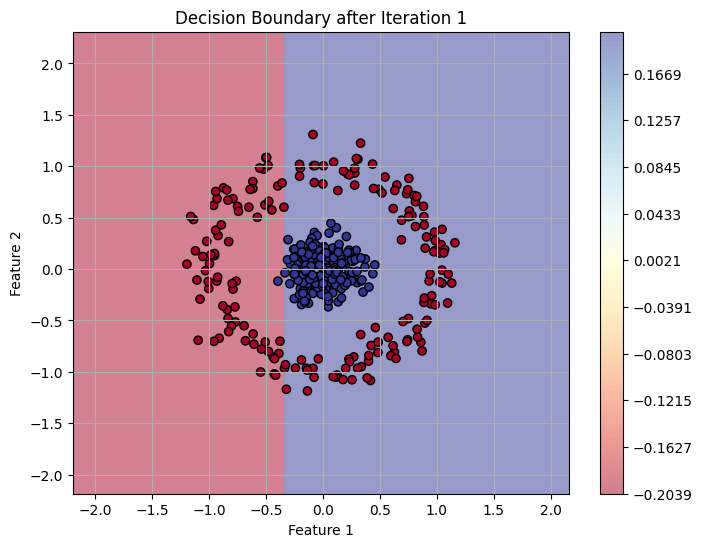

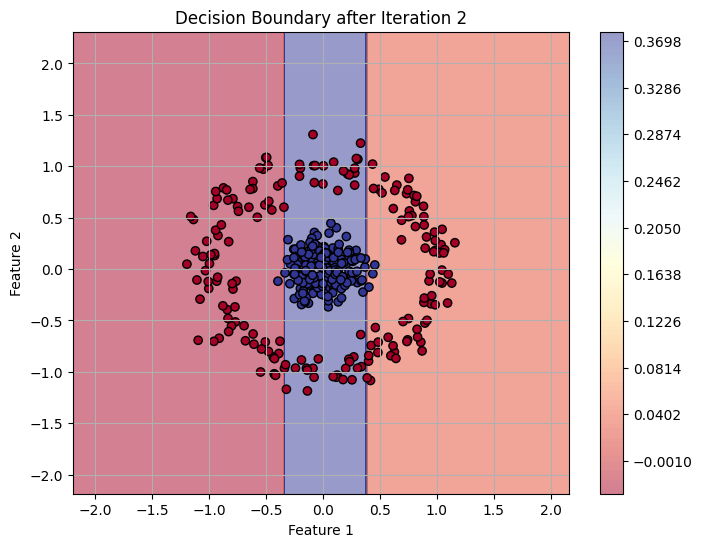

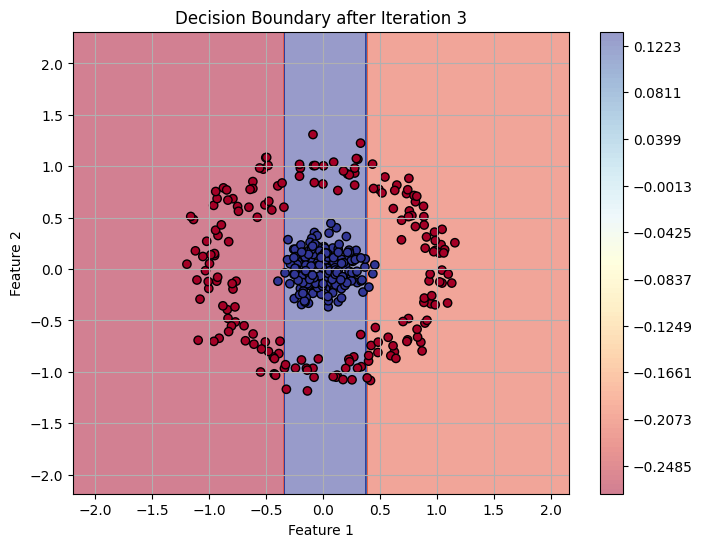

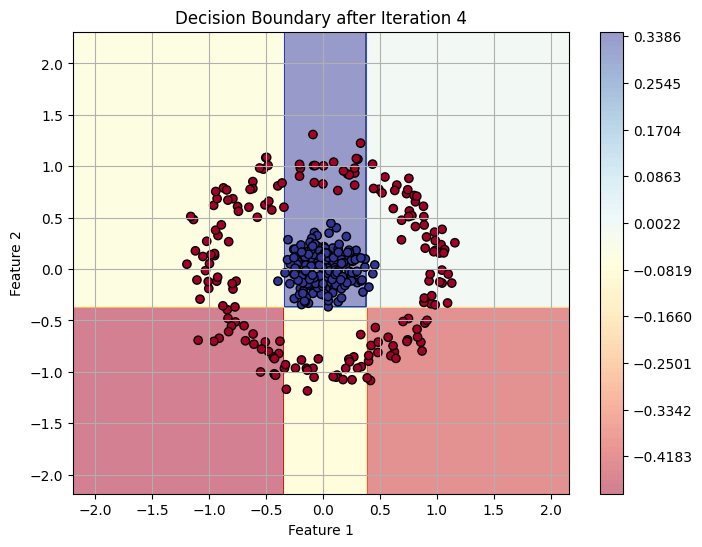

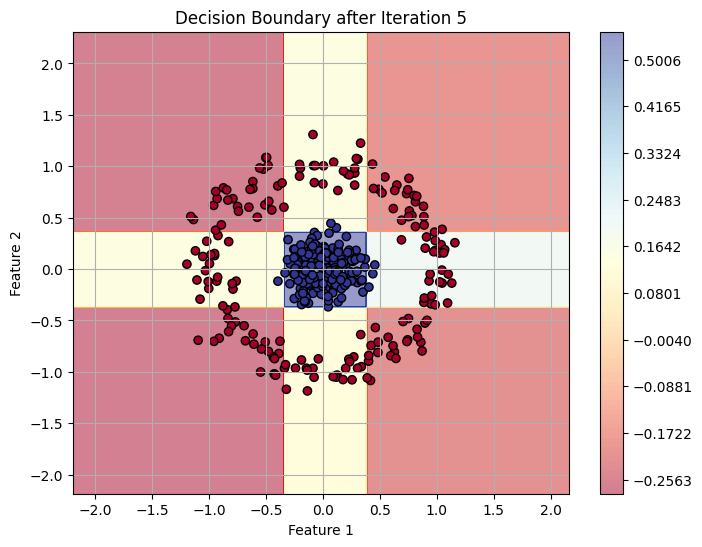

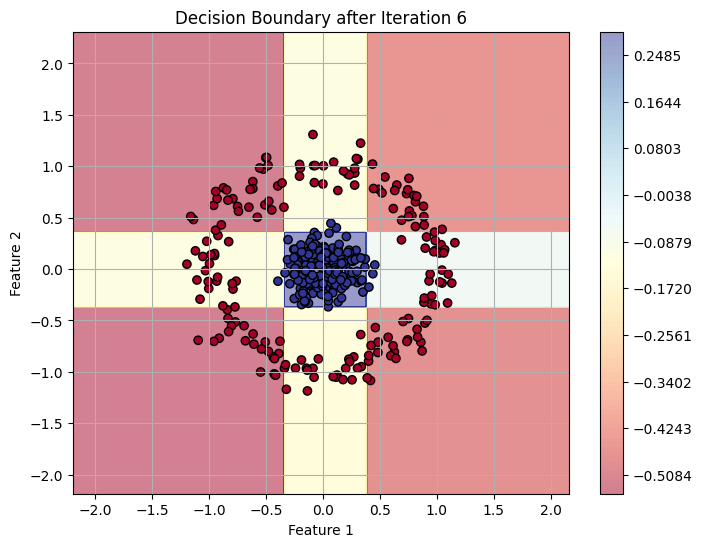

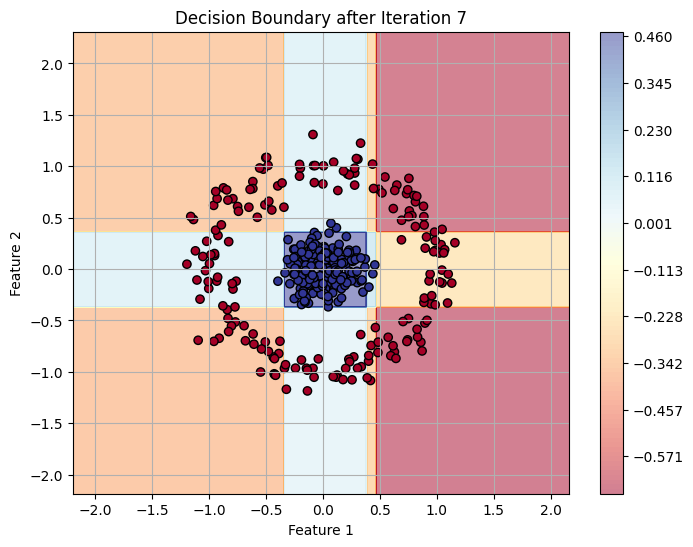

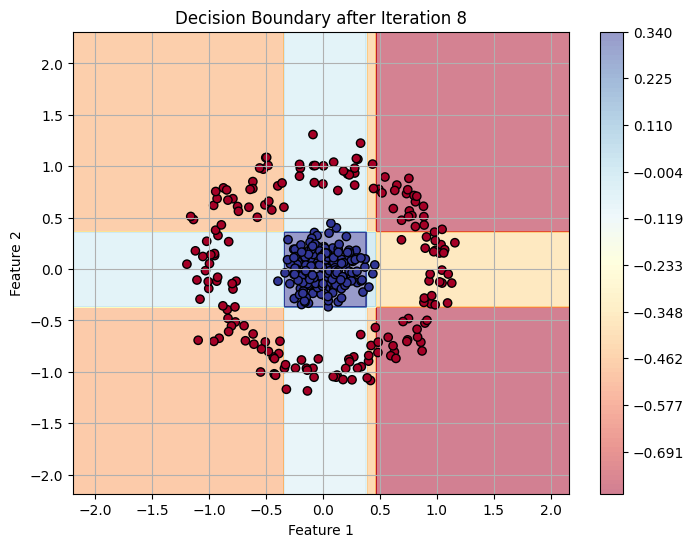

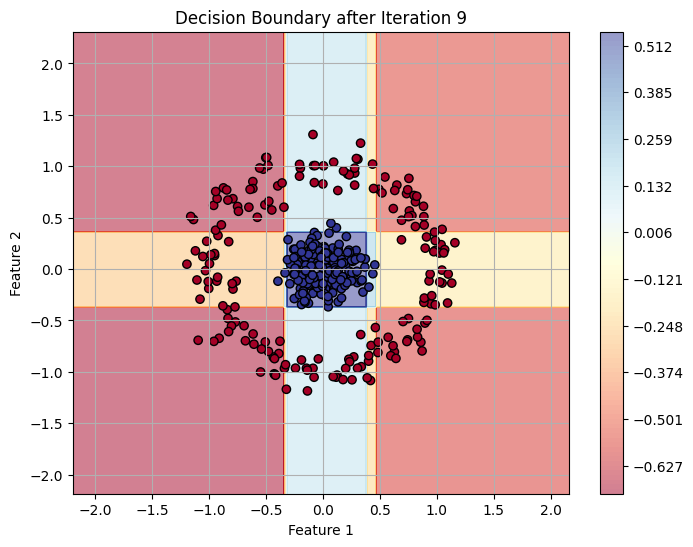

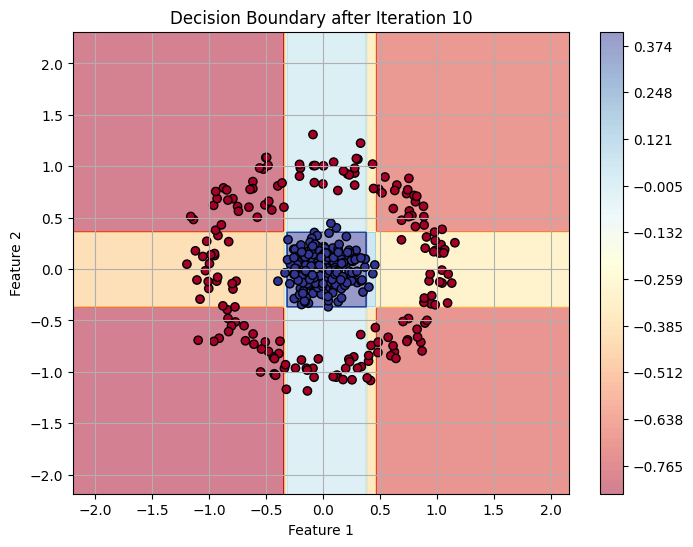

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

class AdaBoost:
    def __init__(self, itr=25, eta=0.5):
        self.itr = itr
        self.eta = eta

    def fit(self, X, Y):
        No_Samples = len(X)
        w = np.full(No_Samples, 1 / No_Samples)

        self.classifier = []
        self.alpha = []

        for i in range(self.itr):
            # Fit the weak classifier (Decision stump)
            Classifier = DecisionTreeClassifier(max_depth=1)
            Classifier.fit(X, Y, sample_weight=w)

            Classifier_predict = Classifier.predict(X)

            # Compute error: Sum of weights of incorrectly classified points
            error = np.sum(w * (Classifier_predict != Y))

            # Alpha
            Alpha = 0.5 * np.log((1 - error) / (error + 1e-10))

            # Store classifier and its weight (alpha)
            self.classifier.append(Classifier)
            self.alpha.append(Alpha)

            # Update weights
            w = w * np.exp(-Alpha * Y * Classifier_predict)
            w = w / np.sum(w)

            # Plotting decision boundary after each fit
            self.plot_decision_boundary(X, Y, i)

    def Predict(self, X):
        y_pred = np.zeros(X.shape[0])

        for classifier, alpha in zip(self.classifier, self.alpha):
            y_pred += self.eta * alpha * classifier.predict(X)
        return np.sign(y_pred)

    def plot_decision_boundary(self, X, Y, iteration):
        # Create a mesh grid
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict on the mesh grid using the current model
        Z = np.zeros(xx.ravel().shape)

        # Calculate predictions based on current weak learners
        for classifier, alpha in zip(self.classifier, self.alpha):
            Z += self.eta * alpha * classifier.predict(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)

        # Plotting decision boundaries using contours
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 100), alpha=0.5, cmap=plt.cm.RdYlBu)
        plt.colorbar()
        plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.RdYlBu)
        plt.title(f'Decision Boundary after Iteration {iteration + 1}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.grid(True)
        plt.show()

# Example usage
X, y = make_circles(n_samples=500, noise=0.1, random_state=42, factor=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Convert labels from 0 to -1
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

# Train AdaBoost
ada = AdaBoost(itr=10, eta=0.5)
ada.fit(X_train, y_train)


In [3]:
from tensorflow.keras.layers import StringLookup

In [4]:
import tensorflow as tf

# Define the vocabulary
vocab = ["a", "b", "c", "d"]

# Sample data
data = [["a", "c", "d", "d"], ["d", "z", "b", "z"]]  # "z" is an out-of-vocabulary (OOV) token

# Create the StringLookup layer with multi-hot output mode
lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='multi_hot')

# Convert data to a TensorFlow tensor
data_tensor = tf.constant(data)  # Convert list of lists to a tensor

# Apply the lookup layer to the data tensor
output = lookup(data_tensor)

print(output.numpy())  # Convert to numpy array for better readability


[[0. 1. 0. 1. 1.]
 [1. 0. 1. 0. 1.]]


In [5]:
tf.__version__

'2.10.1'